# Practice Problems

### Modeling Questions

#### Question 1

I'm trying to build a random forest classifier model that uses the data in sklearn's load_iris dataset to predict the type of Iris based on four features. My code below won't run. What did I do wrong?

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

data = load_iris()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X,y)

model = RandomForestClassifier()
model.fit(X_train,y_train)
#score = accuracy_score(X_test, y_test)
pred = model.predict(X_test)
score = accuracy_score(pred, y_test)
score

0.9210526315789473

Answer: I need to make predictions using the .predict() method before I can score my model. 

#### Question 2

I'm trying to predict using a simple linear regression model with one feature. This model is so simple that my target variable is just 10 times the value of my feature. (I give it a 1, I get 10 back etc.)

For practice, I decide to standardize my feature before fitting my model. Below is my code. It runs ok, but the output doesn't look right. I expected my predictions for [10,11,12] to be [100,110,120], but that isn't what I'm getting. What am I doing wrong?

In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

X_train = np.array([1,2,3,4,5]).reshape(-1,1)
y_train = X_train*10
X_test = np.array([10,11,12]).reshape(-1,1)

scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
#scaled_X_test = scaler.fit_transform(X_test)
scaled_X_test = scaler.transform(X_test)

model = LinearRegression()
model.fit(scaled_X_train, y_train)
pred = model.predict(scaled_X_test)
pred

Answer: By using the .fit_transform() method on my X_test data, I was refitting my scaler with my X_test data. This means that my X_test will be standardized using my X_test mean and standard deviation instead of my X_train mean and standard deviation. It is important that we fit our objects using only our X_train data and then transform our X_test with that fitted object.

### Python Questions

#### Question 1

Write a function that sums all numbers less than a given number that are multiples of 3 or 5. 

Example:

    10 => 23 (3+5+6+9)

In [2]:
def solution(number):
    sum = 0
    for i in range(number):
        if (i % 3) == 0 or (i % 5) == 0:
            sum += i
    return sum

def solution2(number):
    return sum(x for x in range(number) if x % 3 == 0 or x % 5 == 0)

test_num = 10
solution(test_num)

23

#### Question 2

Write a function that takes a number, squares every digit of that number and concatenates the result into a new number.

Example:

    91134 => 8111916

In [3]:
def square_digits(num):
    num = str(num)
    ans = ''
    for i in num:
        ans += str(int(i)**2)
    return int(ans)

def square_digits2(num):
    return int(''.join(str(int(d)**2) for d in str(num)))

test_number = 91134
square_digits(test_number)

8111916

#### Question 3

You live in the city of Cartesia where all roads are laid out in a perfect grid. You arrived ten minutes too early to an appointment, so you decided to take the opportunity to go for a short walk. The city provides its citizens with a Walk Generating App on their phones -- everytime you press the button it sends you an array of one-letter strings representing directions to walk (eg. ['n', 's', 'w', 'e']). You always walk only a single block for each letter and you know it takes you one minute to traverse one city block. Create a function that will return true if the walk the app gives you will take you exactly ten minutes (you don't want to be early or late!) and will, of course, return you to your starting point. Return false otherwise.

Examples:
    
    ['e','w','e','w','n','s','n','s','e','w'] => true
    
    ['w','e','s','n'] => false

In [4]:
def isValidWalk(walk):
    if (walk.count('n') == walk.count('s') and 
        walk.count('e') == walk.count('w') and
        len(walk) == 10):
            return True
    return False

pass_walk = ['e','w','e','w','n','s','n','s','e','w']
fail_walk = ['w','e','s','n']
isValidWalk(fail_walk)

False

#### Question 4

Write a function that takes a string and determines if the order of the parentheses is valid. The function should return true if the string is valid, and false if it's invalid. The input may contain other characters or may be empty and/or not contain any parentheses at all. Do not treat other forms of brackets as parentheses (e.g. [], {}, <>).

Examples:

    "()"                            =>  true

    ")((hello)))"                   =>  false

    "("                             =>  false

    "a(b(c)d)e(f/(g(h.)()i)jk(l))"  =>  true

In [5]:
def valid_parentheses(string):
    count = 0
    for char in string:
        if char == '(': count += 1
        if char == ')': count -= 1
        if count < 0: return False
    return True if count == 0 else False

def valid_parentheses2(string):
    new = ''.join(char for char in string if char in '()')
    while '()' in new:
        new = new.replace('()', '')
    return len(new) == 0

test_string = '(testing()to see)(if this_works)'
valid_parentheses(test_string)

True

#### Question 5

The edit distance between two strings refers to the minimum number of character insertions, deletions, and substitutions required to change one string to the other. Write a function that will compute the edit distance between two given strings. Assume all strings are in lowercase, and you can only add/subtract from the end of a string.

Examples:

    "kitten" to "sitting" => 3
        substitute "k" for "s", "e" for "i", and append a "g"
        
    "input" to "put" => 5
        substitute "i" for "p", "n" for "u", "p" for "t", delete "u" and "t" 

In [6]:
def edit_distance(string1, string2):

    if len(string1) > len(string2):
        difference = len(string1) - len(string2)
        string1 = string1[:-difference]
    elif len(string2) > len(string1):
        difference = len(string2) - len(string1)
        string2 = string2[:-difference]
    else:
        difference = 0

    for i in range(len(string1)):
        if string1[i] != string2[i]:
            difference += 1

    return difference

str1 = 'kitten'
str2 = 'sitting'
edit_distance(str1,str2)

3

### Probability Questions

#### Question 1

A jar has 1000 coins, of which 999 are fair and 1 is double headed. Pick a coin at random, and toss it 10 times. Given that you see 10 heads, what is the probability that the next toss of that coin is also a head?

    There are two ways of choosing the coin. One is to pick a fair coin and the other is to pick the one with two heads.

    Probability of selecting fair coin = 999/1000 = 0.999

    Probability of selecting unfair coin = 1/1000 = 0.001

    Probability of getting 10 heads in a row = Selecting fair coin * Getting 10 heads + Selecting an unfair coin * 1

    P (A) = 0.999 * (1/2)^10 = 0.999 * (1/1024) =  0.000976

    P (B) = 0.001 * 1 =  0.001

    P( A / A + B ) = 0.000976 / (0.000976 + 0.001) =  0.4939

    P( B / A + B ) = 0.001 / 0.001976 =  0.5061

    Probability of selecting another head = P(A/A+B) * 0.5 + P(B/A+B) * 1 = 0.4939 * 0.5 + 0.5061 =  0.7531

#### Question 2

A hunter has two hunting dogs. One day, on the trail of some animal, the hunter comes to a place where the road diverges into two paths. He knows that each dog, independent of the other, will choose the correct path with probability `p`. The hunter decides to let each dog choose a path, and if they agree, he takes that one, and if they disagree, he randomly picks a path. Is his strategy better than just letting one of the two dogs decide on a path? Explain why or why not.

    Denote by A, B the events dog 1 and dog 2 choose the right path and X be the event the hunter chooses the right path. That is,

    P(A) = P(B) = p and we want to find `P(X)`. Compute all four probabilities
   
    P(A and B) = p ^ 2
   
    P(A and B') = P(A' and B) = p * (1 - p)
   
    P(A' and B') = (1 - p) ^ 2` where ‘ is the complement. 

    Computing the hunter's conditional probabilities:
   
    P(X | A and B) = 1
   
    P(X | A and B') =  0.5
   
    P(X | A' and B) =  0.5
   
    P(X | A' and B') = 0
   
    P(X) = 1 * p^2 + 0.5 * p * (1 - p) + 0.5 * p * (1 - p) + 0 * (1 - p)^2   = p^2 + p - p^2 = p
   
    Therefore, the strategy is identical to letting one dog decide.

### Pandas / Matplotlib

#### Question 1

Using the load_diabetes dataset from sklearn, create a pandas dataframe.

In [7]:
import pandas as pd
from sklearn.datasets import load_diabetes

data = load_diabetes()
X, y = data.data, data.target
df = pd.DataFrame(X, columns=data.feature_names)

#### Question 2

Find the mean BMI of all patients in the top quartile of age.

In [8]:
df[df['age'] >= df['age'].quantile(.75)]['bmi'].mean()

0.006432107792441249

#### Question 3

Create a scatter plot for each feature vs the target variable.

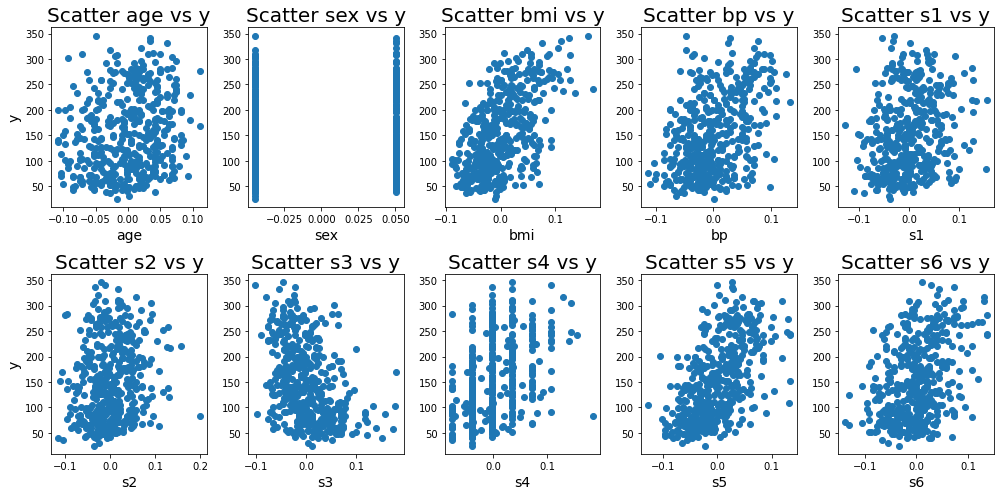

In [9]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2,5, figsize=(14,7))

for i,ax in enumerate(axs.flatten()):
    ax.scatter(df[data.feature_names[i]],y)
    ax.set_title('Scatter ' + data.feature_names[i] + ' vs y', size=20)
    ax.set_xlabel(data.feature_names[i], size=14)
    if i%5 == 0:
        ax.set_ylabel('y', size=14)
    
plt.tight_layout()